In [8]:
import matplotlib.pyplot as plt
import numpy as np
import uproot3
import scipy
from scipy.stats import norm
import statistics

In [9]:
root_file = "new_pu10.root"
file = uproot3.open(root_file)

In [10]:
event_amvf = [file["amvf;1"]["nRecoVtx"].array(), 
              file["amvf;1"]["nTrueVtx"].array(),
              file["amvf;1"]["nVtxReconstructable"].array(),
              file["amvf;1"]["diffx"].array(),
              file["amvf;1"]["diffy"].array(),
              file["amvf;1"]["diffz"].array()]

event_truth = [file["Truth_Vertex;7"]["event_id"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vx"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vy"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vz"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_d0"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_z0"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_phi"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_theta"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_qp"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_time"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_vtxID"].array(),
               file["Truth_Vertex;7"]["truth_particle_p"].array(),
               file["Truth_Vertex;7"]["truth_particle_px"].array(),
               file["Truth_Vertex;7"]["truth_particle_py"].array(),
               file["Truth_Vertex;7"]["truth_particle_pz"].array(),
               file["Truth_Vertex;7"]["truth_particle_pt"].array()]

event_reco = [file["Reco_Vertex;4"]["event_id"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vx"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vy"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vz"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_d0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_z0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_phi"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_theta"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_qp"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_time"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_vtxID"].array(), 
              file["Reco_Vertex;4"]["reco_vtx_fitquality_chiSquared"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_trackWeight"].array()]

event_amvf = np.expand_dims(event_amvf, axis = -1)
event_amvf = event_amvf.transpose((1,0,2))
event_amvf = np.squeeze(event_amvf, axis= (2,))

event_truth = np.expand_dims(event_truth, axis = -1)
event_truth = event_truth.transpose((1,0,2))
event_truth = np.squeeze(event_truth, axis= (2,))

event_reco = np.expand_dims(event_reco, axis = -1)
event_reco = event_reco.transpose((1,0,2))
event_reco = np.squeeze(event_reco, axis= (2,))

In [11]:
_nRecoVtx, _nTrueVtx, _nVtxReconstructible, _diffx, _diffy, _diffz = 0, 1, 2, 3, 4, 5
_event_id, _truth_vtx_vx, _truth_vtx_vy, _truth_vtx_vz, _truth_trk_d0, _truth_trk_z0, _truth_trk_phi, _truth_trk_theta, _truth_trk_qp, _truth_trk_time, _truth_trk_vtxid, _truth_ptc_p, _truth_ptc_px, _truth_ptc_py, _truth_ptc_pz, _truth_ptc_pt = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
_event_id, _reco_vtx_vx, _reco_vtx_vy, _reco_vtx_vz, _reco_trk_d0, _reco_trk_z0, _reco_trk_phi, _reco_trk_theta, _reco_trk_qp, _reco_trk_time, _reco_trk_vtxid, _reco_chi2, _reco_trkweight = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

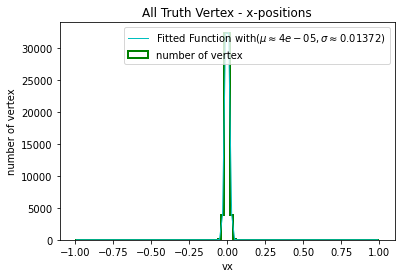

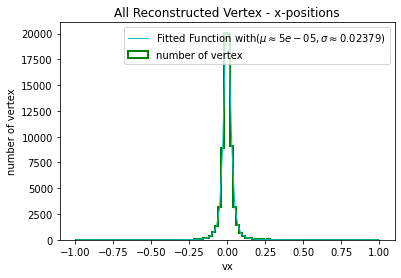

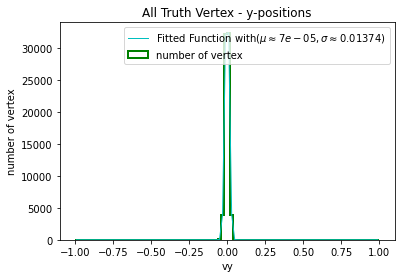

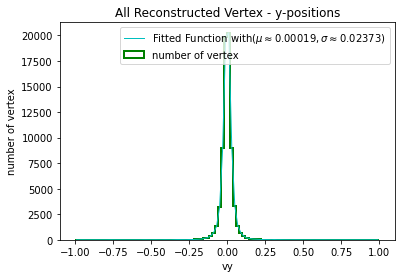

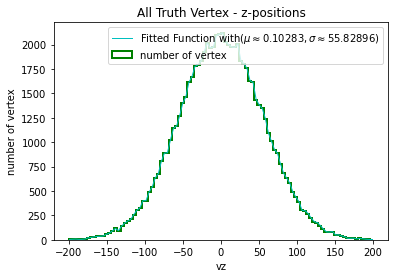

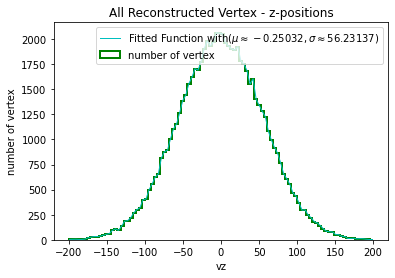

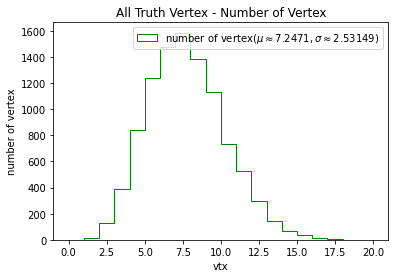

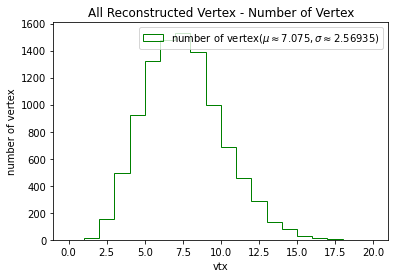

In [25]:
vx_truth, vx_reco, vy_truth, vy_reco, vz_truth, vz_reco, vtx_truth, vtx_reco = [], [], [], [], [], [], [], []

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = scipy.optimize.curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

for i in range(len(event_truth)): # loop around events
    vtx_truth.append(int(len(event_truth[i][_truth_vtx_vx])))
    vtx_reco.append(int(len(event_reco[i][_truth_vtx_vx])))
    for j in range(len(event_truth[i][_truth_vtx_vx])):  # loop on vertex
        vx_truth.append(event_truth[i][_truth_vtx_vx][j])
        vy_truth.append(event_truth[i][_truth_vtx_vy][j])
        vz_truth.append(event_truth[i][_truth_vtx_vz][j])
    for k in range(len(event_reco[i][_reco_vtx_vx])):
        vx_reco.append(event_reco[i][_reco_vtx_vx][k])
        vy_reco.append(event_reco[i][_reco_vtx_vy][k])
        vz_reco.append(event_reco[i][_reco_vtx_vz][k])
        
# define the plots
fig_vx_truth, ax_vx_truth = plt.subplots()
fig_vx_reco, ax_vx_reco = plt.subplots()
fig_vy_truth, ax_vy_truth = plt.subplots()
fig_vy_reco, ax_vy_reco = plt.subplots()
fig_vz_truth, ax_vz_truth = plt.subplots()
fig_vz_reco, ax_vz_reco = plt.subplots()
fig_vtx_truth, ax_vtx_truth = plt.subplots()
fig_vtx_reco, ax_vtx_reco = plt.subplots()
                    
# vx, vy plot
bin = np.linspace(-1, 1, 101)
counts, bins = np.histogram(vx_truth, bins=bin, range=(-1, 1))
ax_vx_truth.hist(vx_truth, bins=bin, color='green', histtype='step', linewidth=2, label='number of vertex')
#(mu, sigma) = stats.norm.fit(vx_truth)
xdata = np.linspace(-0.99, 0.99, 100)
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vx_truth.plot(xdata, counts, color='c', linewidth=1, label='Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

bin = np.linspace(-1, 1, 101)
counts, bins = np.histogram(vx_reco, bins=bin, range=(-1, 1))
ax_vx_reco.hist(vx_reco, bins=bin, color='green', histtype='step', linewidth=2, label='number of vertex')
xdata = np.linspace(-0.99, 0.99, 100)
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vx_reco.plot(xdata, counts, color='c', linewidth=1, label='Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

bin = np.linspace(-1, 1, 101)
counts, bins = np.histogram(vy_truth, bins=bin, range=(-1, 1))
ax_vy_truth.hist(vy_truth, bins=bin, color='green', histtype='step', linewidth=2, label='number of vertex')
xdata = np.linspace(-0.99, 0.99, 100)
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vy_truth.plot(xdata, counts, color='c', linewidth=1, label='Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

bin = np.linspace(-1, 1, 101)
counts, bins = np.histogram(vy_reco, bins=bin, range=(-1, 1))
ax_vy_reco.hist(vy_reco, bins=bin, color='green', histtype='step', linewidth=2, label='number of vertex')
xdata = np.linspace(-0.99, 0.99, 100)
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vy_reco.plot(xdata, counts, color='c', linewidth=1, label='Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

bin = np.linspace(-200, 200, 101)
counts, bins = np.histogram(vz_truth, bins=bin, range=(-200, 200))
ax_vz_truth.hist(vz_truth, bins=bin, color='green', histtype='step', linewidth=2, label='number of vertex')
xdata = np.linspace(-199, 199, 100)
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vz_truth.plot(xdata, counts, color='c', linewidth=1, label='Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

bin = np.linspace(-200, 200, 101)
counts, bins = np.histogram(vz_reco, bins=bin, range=(-200, 200))
ax_vz_reco.hist(vz_reco, bins=bin, color='green', histtype='step', linewidth=2, label='number of vertex')
xdata = np.linspace(-199, 199, 100)
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vz_reco.plot(xdata, counts, color='c', linewidth=1, label='Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

bin = np.linspace(0, 20, 21)
(mu, sigma) = scipy.stats.norm.fit(vtx_truth)
ax_vtx_truth.hist(vtx_truth, bins=bin, color='green', histtype='step', label='number of vertex' + f'$(\mu \\approx {round(mu, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

bin = np.linspace(0, 20, 21)
(mu, sigma) = scipy.stats.norm.fit(vtx_reco)
ax_vtx_reco.hist(vtx_reco, bins=bin, color='green', histtype='step', label='number of vertex' + f'$(\mu \\approx {round(mu, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

ax_vx_truth.set_title('All Truth Vertex - x-positions', fontsize=12)
ax_vx_reco.set_title('All Reconstructed Vertex - x-positions', fontsize=12)
ax_vy_truth.set_title('All Truth Vertex - y-positions', fontsize=12)
ax_vy_reco.set_title('All Reconstructed Vertex - y-positions', fontsize=12)
ax_vz_truth.set_title('All Truth Vertex - z-positions', fontsize=12)
ax_vz_reco.set_title('All Reconstructed Vertex - z-positions', fontsize=12)
ax_vtx_truth.set_title('All Truth Vertex - Number of Vertex', fontsize=12)
ax_vtx_reco.set_title('All Reconstructed Vertex - Number of Vertex', fontsize=12)

ax_vx_truth.set_xlabel('vx')
ax_vx_reco.set_xlabel('vx')
ax_vy_truth.set_xlabel('vy')
ax_vy_reco.set_xlabel('vy')
ax_vz_truth.set_xlabel('vz')
ax_vz_reco.set_xlabel('vz')
ax_vtx_truth.set_xlabel('vtx')
ax_vtx_reco.set_xlabel('vtx')

ax_vx_truth.set_ylabel('number of vertex')
ax_vx_reco.set_ylabel('number of vertex')
ax_vy_truth.set_ylabel('number of vertex')
ax_vy_reco.set_ylabel('number of vertex')
ax_vz_truth.set_ylabel('number of vertex')
ax_vz_reco.set_ylabel('number of vertex')
ax_vtx_truth.set_ylabel('number of vertex')
ax_vtx_reco.set_ylabel('number of vertex')


ax_vx_truth.legend(fontsize=10, loc="upper right")
ax_vx_reco.legend(fontsize=10, loc="upper right")
ax_vy_truth.legend(fontsize=10, loc="upper right")
ax_vy_reco.legend(fontsize=10, loc="upper right")
ax_vz_truth.legend(fontsize=10, loc="upper right")
ax_vz_reco.legend(fontsize=10, loc="upper right")
ax_vtx_truth.legend(fontsize=10, loc="upper right")
ax_vtx_reco.legend(fontsize=10, loc="upper right")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.text(0.25, 23000, 'mean= %.8f'%mean, fontsize=10)
#plt.text(0.25, 21000, 'standard deviation= %.4f'%stadev, fontsize=10)
plt.show()